In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
relative_quant = pd.read_csv('C:/Users/avay.risal/OneDrive - Texas A&M AgriLife/Documents/ANOVA/plamv_10.csv')
relative_quant.shape

(66, 2)

In [57]:
relative_quant.head()

,sample,rq
0,BI1,NaN
1,BI1,2.75
2,BI1,NaN
3,BI1,3.06
4,BI1,NaN


In [58]:
relative_quant[['rq']].dropna().mean(axis=0)

rq    47.904844
dtype: float64

In [59]:
relative_quant[['rq']].dropna().describe()

,rq
count,32.000000
mean,47.904844
std,131.609134
min,0.238000
25%,0.774750
50%,3.845500
75%,20.082500
max,665.798000


In [60]:
relative_quant.groupby('sample').mean()

,rq
sample,
BI1,3.272667
BI1BZIP60,20.106000
BZIP60,333.022500
COL0,7.983000
IRE1A,32.901333
IRE1A1B,6.680750
IRE1A1BBI1,198.276000
IRE1ABI1,0.521000
IRE1B,12.781667


In [61]:
relative_quant.groupby('sample').describe()

rq                                                       \
           count        mean         std     min        25%       50%   
sample                                                                  
BI1          3.0    3.272667    0.655409   2.750    2.90500    3.0600   
BI1BZIP60    3.0   20.106000   33.976863   0.412    0.48950    0.5670   
BZIP60       2.0  333.022500  470.615625   0.247  166.63475  333.0225   
COL0         4.0    7.983000    7.548922   1.000    2.64025    6.5990   
IRE1A        3.0   32.901333   22.176046  20.067   20.09800   20.1290   
IRE1A1B      4.0    6.680750    4.274142   1.543    4.16350    6.9720   
IRE1A1BBI1   3.0  198.276000  141.179693  60.985  125.89050  190.7960   
IRE1ABI1     3.0    0.521000    0.271796   0.238    0.39150    0.5450   
IRE1B        3.0   12.781667   13.220770   3.683    5.19900    6.7150   
IRE1BBI1     3.0    1.306667    1.430121   0.296    0.48850    0.6810   
MOCK         1.0    0.759000         NaN   0.759    0.75900    0.7590   

                                
                  75%      max  
sample                          
BI1           3.53400    4.008  
BI1BZIP60    29.95300   59.339  
BZIP60      499.41025  665.798  
COL0         11.94175   17.734  
IRE1A        39.31850   58.508  
IRE1A1B       9.48925   11.236  
IRE1A1BBI1  266.92150  343.047  
IRE1ABI1      0.66250    0.780  
IRE1B        17.33100   27.947  
IRE1BBI1      1.81200    2.943  
MOCK          0.75900    0.759

In [62]:
summary = relative_quant[['rq','sample']].groupby('sample').describe()
summary.head()

rq                                                       \
          count        mean         std     min        25%       50%   
sample                                                                 
BI1         3.0    3.272667    0.655409   2.750    2.90500    3.0600   
BI1BZIP60   3.0   20.106000   33.976863   0.412    0.48950    0.5670   
BZIP60      2.0  333.022500  470.615625   0.247  166.63475  333.0225   
COL0        4.0    7.983000    7.548922   1.000    2.64025    6.5990   
IRE1A       3.0   32.901333   22.176046  20.067   20.09800   20.1290   

                               
                 75%      max  
sample                         
BI1          3.53400    4.008  
BI1BZIP60   29.95300   59.339  
BZIP60     499.41025  665.798  
COL0        11.94175   17.734  
IRE1A       39.31850   58.508

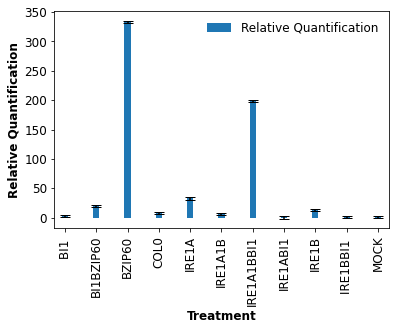

In [63]:
ax= summary.plot.bar(y= 1, yerr=2,capsize=5, width=0.2, label='Relative Quantification')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

    
plt.xlabel('Treatment',size = 12,fontweight ='bold')
plt.ylabel('Relative Quantification',size = 12,fontweight ='bold')

plt.legend(fontsize=12 , loc=0, frameon=False)

Text(0, 0.5, 'Relative Quantification')

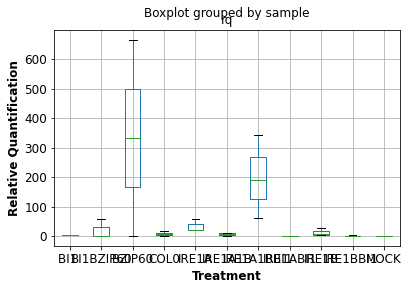

In [64]:
#boxplot
ax2= relative_quant.boxplot('rq', by = 'sample')

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    
plt.xlabel('Treatment',size = 12,fontweight ='bold')
plt.ylabel('Relative Quantification',size = 12,fontweight ='bold')


In [65]:
mod =ols('rq ~ sample', data=relative_quant).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                 sum_sq    df        F    PR(>F)
sample    271734.564128  10.0  2.15162  0.066857
Residual  265215.325204  21.0      NaN       NaN
